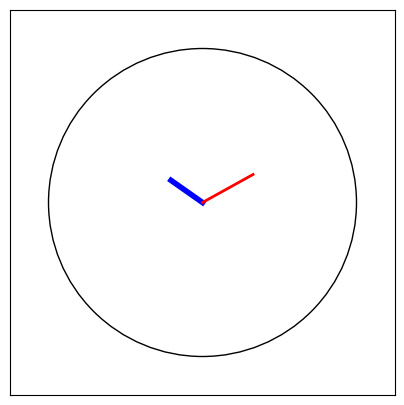

In [37]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import datetime
import numpy as np

def plot_clock(datetime_obj):
    # Get the current time
    hour = datetime_obj.hour
    minute = datetime_obj.minute
    second = datetime_obj.second
    microsecond =  datetime_obj.microsecond

    # Calculate the angles for the hour and minute hands
    hour_angle = -(((hour % 12) * 30) + ((minute / 60) * 30) + ((second/3600) * 30) + (microsecond/3600000000) * 30)
    minute_angle = -(((minute / 60) * 360) + ((second/3600) * 360) + ((microsecond/3600000000) * 360) )

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(5, 5))

    # Set the aspect ratio of the plot to equal
    ax.set_aspect('equal')

    # Create the clock face circle
    circle = patches.Circle((0.5, 0.5), radius=0.4, edgecolor='black', facecolor='white')
    ax.add_patch(circle)

    # Create the hour hand
    hour_hand_x = [0.5, 0.5 + 0.2 * 0.5 * -np.sin(np.radians(hour_angle))]
    hour_hand_y = [0.5, 0.5 + 0.2 * 0.5 * np.cos(np.radians(hour_angle))]
    hour_hand = plt.Line2D(hour_hand_x, hour_hand_y, linewidth=4, color='blue')
    ax.add_line(hour_hand)

    # Create the minute hand
    minute_hand_x = [0.5, 0.5 + 0.3 * 0.5 * -np.sin(np.radians(minute_angle))]
    minute_hand_y = [0.5, 0.5 + 0.3 * 0.5 * np.cos(np.radians(minute_angle))]
    minute_hand = plt.Line2D(minute_hand_x, minute_hand_y, linewidth=2, color='red')
    ax.add_line(minute_hand)

    # Set the axis limits and remove ticks
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([])

    # Show the plot
    plt.show()


time_clock = datetime.time(10,10,10,10)

# Call the plot_clock function
#plot_clock(datetime.datetime.now())
plot_clock(time_clock)

In [39]:
time_clock = datetime.time(2, 40, 50, 0)

def time_clock_microsec(time_clock_array):
  """from datetime.time to microsecond"""
  result = time_clock_array.microsecond
  result = result + 1000000*time_clock_array.second
  result = result + 60*1000000*time_clock_array.minute
  result = result + 60*60*1000000*time_clock_array.hour
  return result

def microsec_time_clock(microsecond):
  """from microsecond to time clock array"""
  hour = microsecond // 3600000000
  remainder_hour = microsecond % 3600000000
  #print(hour, remainder_hour)

  minute = remainder_hour // 60000000
  remainder_minute = remainder_hour % 60000000
  #print(minute, remainder_minute)

  second = remainder_minute // 1000000
  microsecond = remainder_minute % 1000000
  #print(second, microsecond)

  return datetime.time(hour,minute,second,microsecond)

m = time_clock_microsec(time_clock)
tc = microsec_time_clock(m)

print(m)
print(tc)

9650000000
02:40:50


In [40]:
time_clock = datetime.time(1,3,0,0)
def hour_hand_angle(time_clock_array):
  """ the angle of hour hand relative to 00:00:00"""
  HOUR2MICROSECOND = 43200000000
  HOUR_HAND_ANGLE_MOVEMENT = 360/HOUR2MICROSECOND
  microsecond_time = time_clock_microsec(time_clock_array)
  remainder_time = microsecond_time % HOUR2MICROSECOND
  return (HOUR_HAND_ANGLE_MOVEMENT * remainder_time)

def minute_hand_angle(time_clock_array):
  """ the angle of minute hand relative to 00:00:00"""
  MINUTE2MICROSECOND = 3600000000
  MINUTE_HAND_ANGLE_MOVEMENT = 360/MINUTE2MICROSECOND
  microsecond_time = time_clock_microsec(time_clock_array)
  remainder_time = microsecond_time % MINUTE2MICROSECOND
  return (MINUTE_HAND_ANGLE_MOVEMENT * remainder_time)

def hour_minute_hand_angle(time_clock_array, negative_degree = False):
  """ the angle of hour hand minute hand"""
  the_hour_hand_angle = hour_hand_angle(time_clock_array)
  the_minute_hand_angle = minute_hand_angle(time_clock_array)

  #print(f"hour_angle: {the_hour_hand_angle}, minute_angle: {the_minute_hand_angle}")

  minute_minus_hour = the_minute_hand_angle - the_hour_hand_angle

  if negative_degree:
    return minute_minus_hour

  minute_degree_bigger = the_minute_hand_angle > the_hour_hand_angle
  return minute_minus_hour if minute_degree_bigger else (0 - minute_minus_hour)



time_clock = datetime.time(0,0,3,0)
hour_minute_hand_angle(time_clock, negative_degree = True)

0.27499999999999997

In [41]:
def midpoint_tc(tc_upper, tc_lower):
  """finding midpoint of time_clock"""
  upper_bound_m = time_clock_microsec(tc_upper)
  lower_bound_m = time_clock_microsec(tc_lower)

  middle_point_m = (upper_bound_m + lower_bound_m) // 2
  middle_point_tc = microsec_time_clock(middle_point_m)
  return middle_point_tc

time_clock_u = datetime.time(6,33,0,10)
time_clock_l = datetime.time(6,33,0,0)
midpoint_tc(time_clock_u, time_clock_l)

datetime.time(6, 33, 0, 5)

In [42]:
def iteratively_to_find_exact_degree(exact_angle, tc_upper, tc_lower, iter_max = 10000, verbose = False):

  upper_bound_m = time_clock_microsec(tc_upper)
  lower_bound_m = time_clock_microsec(tc_lower)

  upper_bound_tc = tc_upper
  lower_bound_tc = tc_lower
  midpoint_bound_tc =  midpoint_tc(upper_bound_tc, lower_bound_tc)

  for i in range(iter_max):
    angle_ub = hour_minute_hand_angle(upper_bound_tc, negative_degree = True)
    angle_lb = hour_minute_hand_angle(lower_bound_tc, negative_degree = True)
    angle_mb = hour_minute_hand_angle(midpoint_bound_tc, negative_degree = True)

    result = f"iter:{i} ub_tc: {upper_bound_tc} with angle: {angle_ub}, lb_tc: {lower_bound_tc} with angle: {angle_lb}, mb_tc: {midpoint_bound_tc} with angle: {angle_mb}, improv: {angle_mb-angle_lb}."

    if verbose:
      print(result)

    if angle_lb == exact_angle:
      return lower_bound_tc

    elif angle_ub == exact_angle:
      return upper_bound_tc

    elif angle_mb == exact_angle:
      return midpoint_bound_tc

    elif (upper_bound_tc == midpoint_bound_tc) or (lower_bound_tc == midpoint_bound_tc):
      return upper_bound_tc if abs(angle_ub - exact_angle) < abs(angle_lb - exact_angle) else lower_bound_tc

    elif (angle_lb < exact_angle < angle_mb):
      upper_bound_tc = midpoint_bound_tc
      midpoint_bound_tc = midpoint_tc(upper_bound_tc, lower_bound_tc)

    elif (angle_mb < exact_angle < angle_ub):
      lower_bound_tc = midpoint_bound_tc
      midpoint_bound_tc = midpoint_tc(upper_bound_tc, lower_bound_tc)

  return result

iteratively_to_find_exact_degree(45, datetime.time(4,59,59,999),datetime.time(4,0,0,0), iter_max = 1000)


datetime.time(4, 30)

In [43]:
time_clock = datetime.time(4, 30)
hour_minute_hand_angle(time_clock, negative_degree = True)

45.0

In [60]:
def hour_minute_hand_angle_neg(microsecond, negative_degree = True):
  """ the angle of hour hand minute hand"""

  time_clock_array = microsec_time_clock(microsecond)
  the_hour_hand_angle = hour_hand_angle(time_clock_array)
  the_minute_hand_angle = minute_hand_angle(time_clock_array)

  #print(f"hour_angle: {the_hour_hand_angle}, minute_angle: {the_minute_hand_angle}")

  minute_minus_hour = the_minute_hand_angle - the_hour_hand_angle

  if negative_degree:
    return minute_minus_hour

  minute_degree_bigger = the_minute_hand_angle > the_hour_hand_angle
  return minute_minus_hour if minute_degree_bigger else (0 - minute_minus_hour)

def finite_difference_derivative(f, x, h=1):
    derivative = (f(x + h) - f(x)) / h
    return derivative

def newton_raphson_angle(desired_angle, tc_init, epsilon=1e-6, max_iterations=100):
    approximation = time_clock_microsec(tc_init) # Initial guess

    for i in range(max_iterations):
        function_value = hour_minute_hand_angle_neg(approximation) - desired_angle
        derivative_value = finite_difference_derivative(hour_minute_hand_angle_neg, approximation)

        print(f'iteration: {i}')
        print(f'pre-approximation: {approximation}')
        print(f'function_value: {function_value}')
        print(f'derivative_value: {derivative_value}')

        approximation -= int(function_value / derivative_value)

        print(f'post-approximation: {approximation}')
        print()

        if abs(function_value) < epsilon:
            break

    return microsec_time_clock(approximation)

iteration: 0
pre-approximation: 19800000000
function_value: -75.0
derivative_value: 9.166666359305964e-08
post-approximation: 20618181845

iteration: 1
pre-approximation: 20618181845
function_value: 2.4583333129157836e-06
derivative_value: 9.166669201476907e-08
post-approximation: 20618181819

iteration: 2
pre-approximation: 20618181819
function_value: 7.500000265281415e-08
derivative_value: 9.166663517135021e-08
post-approximation: 20618181819

05:43:38.181819


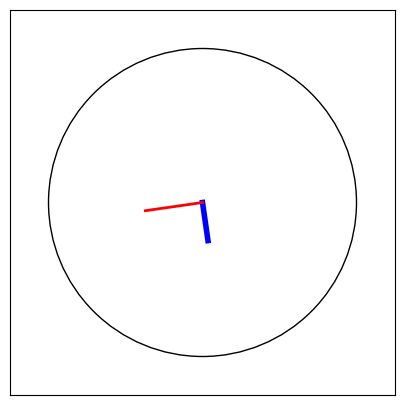

05:43:38.181818


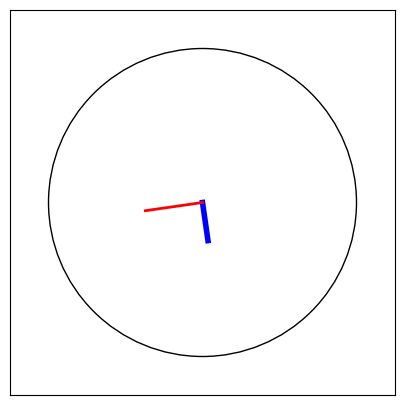

In [67]:
pres = newton_raphson_angle(desired_angle = 90, tc_init =datetime.time(5,30,0,0))
print(pres)
plot_clock(pres)

res = iteratively_to_find_exact_degree(exact_angle=90, tc_lower=datetime.time(5,0,0,0),tc_upper=datetime.time(5,59,59,999), iter_max = 100, verbose = False)
print(res)
plot_clock(res)

iter:0 ub_tc: 05:59:59.000999 with angle: 179.9084249083333, lb_tc: 05:00:00 with angle: -150.0, mb_tc: 05:29:59.500499 with angle: 14.95421240833332, improv: 164.95421240833332.
iter:1 ub_tc: 05:29:59.500499 with angle: 14.95421240833332, lb_tc: 05:00:00 with angle: -150.0, mb_tc: 05:14:59.750249 with angle: -67.52289384166667, improv: 82.47710615833333.
iter:2 ub_tc: 05:29:59.500499 with angle: 14.95421240833332, lb_tc: 05:14:59.750249 with angle: -67.52289384166667, mb_tc: 05:22:29.625374 with angle: -26.284340716666662, improv: 41.23855312500001.
iter:3 ub_tc: 05:29:59.500499 with angle: 14.95421240833332, lb_tc: 05:22:29.625374 with angle: -26.284340716666662, mb_tc: 05:26:14.562936 with angle: -5.6650642000000175, improv: 20.619276516666645.
iter:4 ub_tc: 05:29:59.500499 with angle: 14.95421240833332, lb_tc: 05:26:14.562936 with angle: -5.6650642000000175, mb_tc: 05:28:07.031717 with angle: 4.644574058333319, improv: 10.309638258333337.
iter:5 ub_tc: 05:28:07.031717 with angle: 4

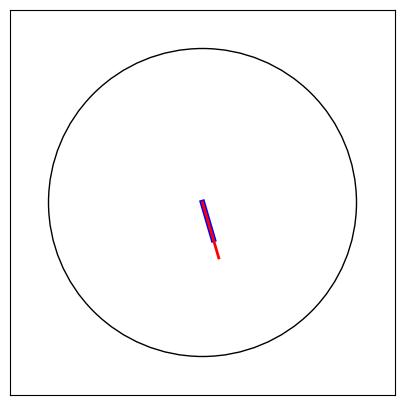

In [44]:
res = iteratively_to_find_exact_degree(exact_angle=0, tc_lower=datetime.time(5,0,0,0),tc_upper=datetime.time(5,59,59,999), iter_max = 100, verbose = True)
print(res)
plot_clock(res)



Hour: 0
00:00:00


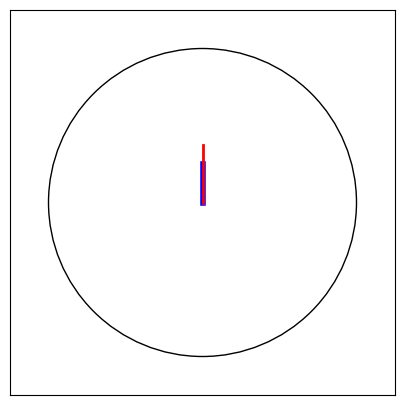


00:00:00


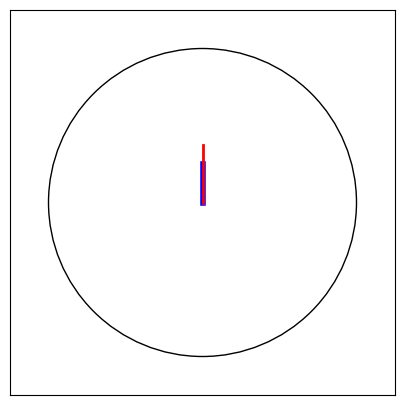


iter:999 ub_tc: 00:59:59.000999 with angle: 329.9084249083333, lb_tc: 00:00:00 with angle: 0.0, mb_tc: 00:29:59.500499 with angle: 164.95421240833332, improv: 164.95421240833332.
Not Exist

iter:999 ub_tc: 00:59:59.000999 with angle: 329.9084249083333, lb_tc: 00:00:00 with angle: 0.0, mb_tc: 00:29:59.500499 with angle: 164.95421240833332, improv: 164.95421240833332.
Not Exist



Hour: 1
01:05:27.272727


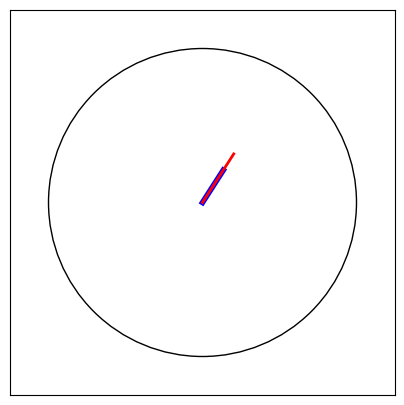


01:05:27.272727


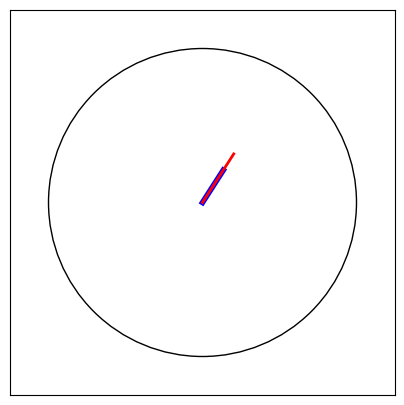


iter:999 ub_tc: 01:59:59.000999 with angle: 299.9084249083333, lb_tc: 01:00:00 with angle: -30.0, mb_tc: 01:29:59.500499 with angle: 134.95421240833332, improv: 164.95421240833332.
Not Exist

iter:999 ub_tc: 01:59:59.000999 with angle: 299.9084249083333, lb_tc: 01:00:00 with angle: -30.0, mb_tc: 01:29:59.500499 with angle: 134.95421240833332, improv: 164.95421240833332.
Not Exist



Hour: 2
02:10:54.545455


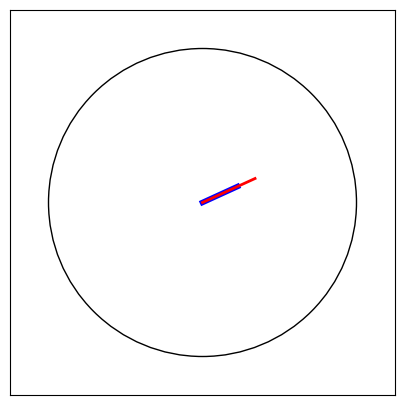


02:10:54.545455


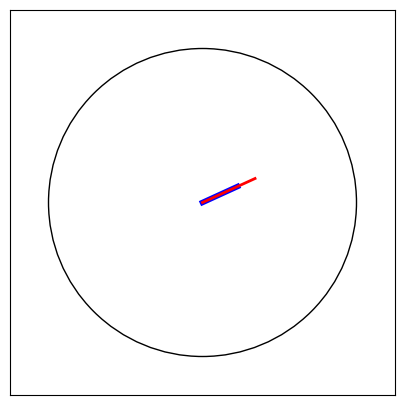


iter:999 ub_tc: 02:59:59.000999 with angle: 269.9084249083333, lb_tc: 02:00:00 with angle: -60.0, mb_tc: 02:29:59.500499 with angle: 104.95421240833332, improv: 164.95421240833332.
Not Exist

iter:999 ub_tc: 02:59:59.000999 with angle: 269.9084249083333, lb_tc: 02:00:00 with angle: -60.0, mb_tc: 02:29:59.500499 with angle: 104.95421240833332, improv: 164.95421240833332.
Not Exist



Hour: 3
03:16:21.818182


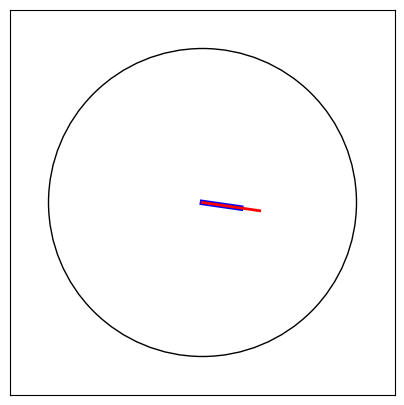


03:16:21.818182


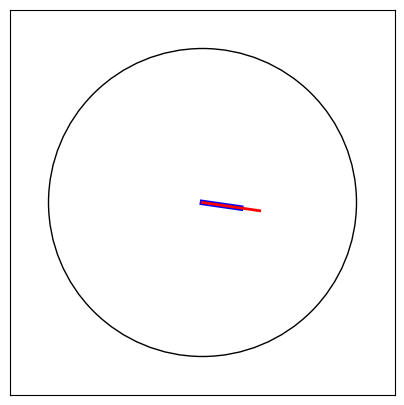


iter:999 ub_tc: 03:59:59.000999 with angle: 239.9084249083333, lb_tc: 03:00:00 with angle: -90.0, mb_tc: 03:29:59.500499 with angle: 74.95421240833332, improv: 164.95421240833332.
Not Exist

iter:999 ub_tc: 03:59:59.000999 with angle: 239.9084249083333, lb_tc: 03:00:00 with angle: -90.0, mb_tc: 03:29:59.500499 with angle: 74.95421240833332, improv: 164.95421240833332.
Not Exist



Hour: 4
04:21:49.090909


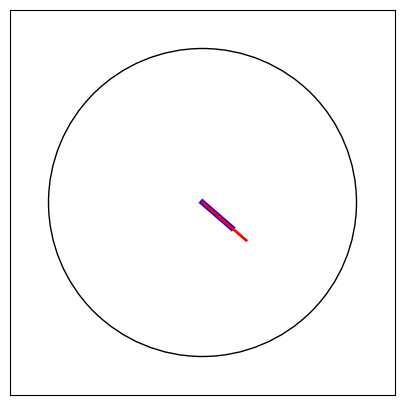


04:21:49.090909


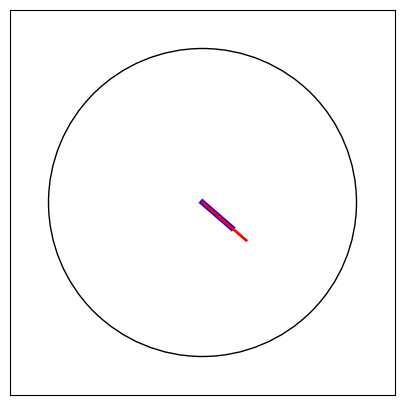


iter:999 ub_tc: 04:59:59.000999 with angle: 209.90842490833333, lb_tc: 04:00:00 with angle: -120.0, mb_tc: 04:29:59.500499 with angle: 44.95421240833332, improv: 164.95421240833332.
Not Exist

iter:999 ub_tc: 04:59:59.000999 with angle: 209.90842490833333, lb_tc: 04:00:00 with angle: -120.0, mb_tc: 04:29:59.500499 with angle: 44.95421240833332, improv: 164.95421240833332.
Not Exist



Hour: 5
05:27:16.363636


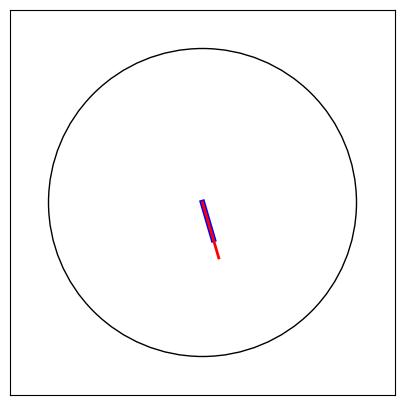


05:27:16.363636


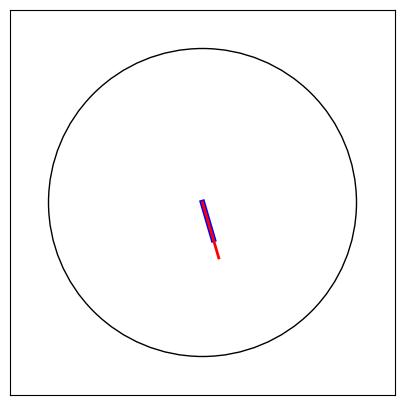


iter:999 ub_tc: 05:59:59.000999 with angle: 179.9084249083333, lb_tc: 05:00:00 with angle: -150.0, mb_tc: 05:29:59.500499 with angle: 14.95421240833332, improv: 164.95421240833332.
Not Exist

iter:999 ub_tc: 05:59:59.000999 with angle: 179.9084249083333, lb_tc: 05:00:00 with angle: -150.0, mb_tc: 05:29:59.500499 with angle: 14.95421240833332, improv: 164.95421240833332.
Not Exist



Hour: 6
06:32:43.636364


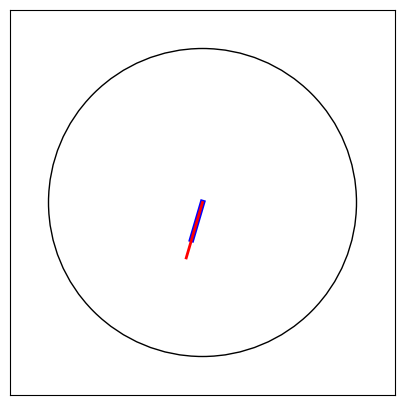


06:32:43.636364


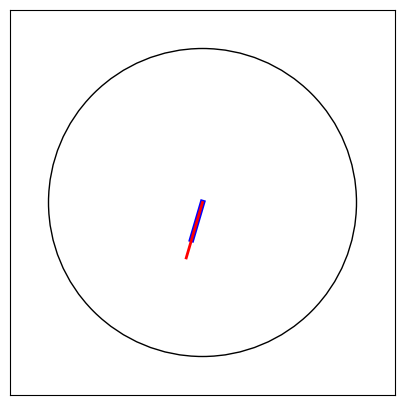


iter:999 ub_tc: 06:59:59.000999 with angle: 149.9084249083333, lb_tc: 06:00:00 with angle: -180.0, mb_tc: 06:29:59.500499 with angle: -15.04578759166668, improv: 164.95421240833332.
Not Exist

iter:999 ub_tc: 06:59:59.000999 with angle: 149.9084249083333, lb_tc: 06:00:00 with angle: -180.0, mb_tc: 06:29:59.500499 with angle: -15.04578759166668, improv: 164.95421240833332.
Not Exist



Hour: 7
07:38:10.909091


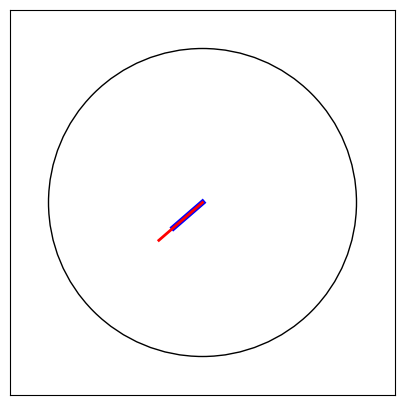


07:38:10.909091


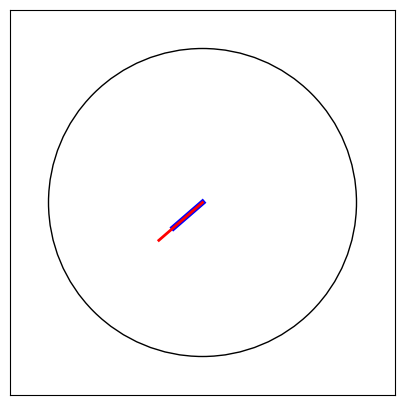


iter:999 ub_tc: 07:59:59.000999 with angle: 119.9084249083333, lb_tc: 07:00:00 with angle: -210.0, mb_tc: 07:29:59.500499 with angle: -45.04578759166668, improv: 164.95421240833332.
Not Exist

iter:999 ub_tc: 07:59:59.000999 with angle: 119.9084249083333, lb_tc: 07:00:00 with angle: -210.0, mb_tc: 07:29:59.500499 with angle: -45.04578759166668, improv: 164.95421240833332.
Not Exist



Hour: 8
08:43:38.181818


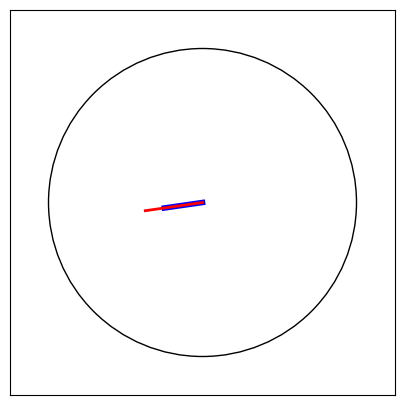


08:43:38.181818


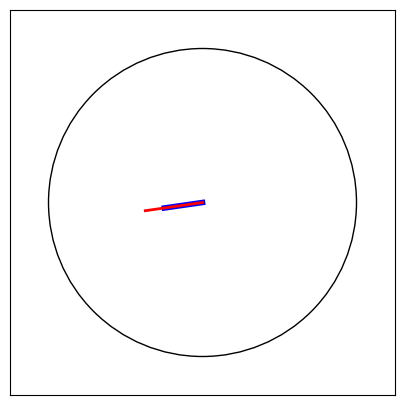


iter:999 ub_tc: 08:59:59.000999 with angle: 89.9084249083333, lb_tc: 08:00:00 with angle: -240.0, mb_tc: 08:29:59.500499 with angle: -75.04578759166668, improv: 164.95421240833332.
Not Exist

iter:999 ub_tc: 08:59:59.000999 with angle: 89.9084249083333, lb_tc: 08:00:00 with angle: -240.0, mb_tc: 08:29:59.500499 with angle: -75.04578759166668, improv: 164.95421240833332.
Not Exist



Hour: 9
09:49:05.454545


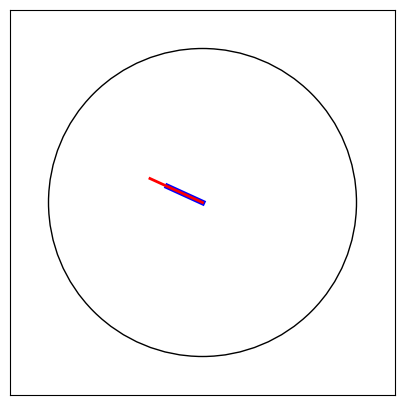


09:49:05.454545


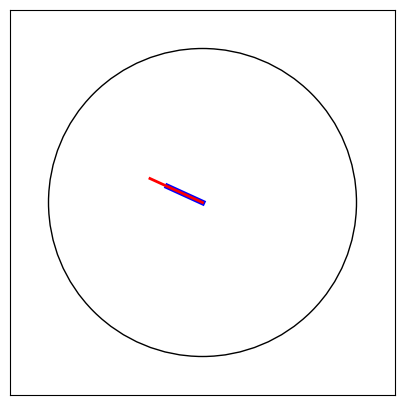


iter:999 ub_tc: 09:59:59.000999 with angle: 59.9084249083333, lb_tc: 09:00:00 with angle: -270.0, mb_tc: 09:29:59.500499 with angle: -105.04578759166671, improv: 164.9542124083333.
Not Exist

iter:999 ub_tc: 09:59:59.000999 with angle: 59.9084249083333, lb_tc: 09:00:00 with angle: -270.0, mb_tc: 09:29:59.500499 with angle: -105.04578759166671, improv: 164.9542124083333.
Not Exist



Hour: 10
10:54:32.727273


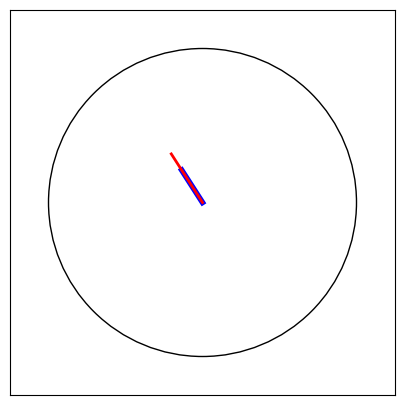


10:54:32.727273


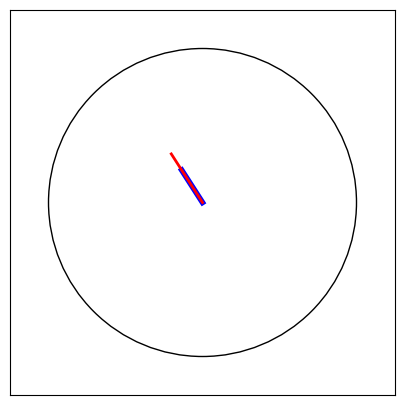


iter:999 ub_tc: 10:59:59.000999 with angle: 29.908424908333302, lb_tc: 10:00:00 with angle: -300.0, mb_tc: 10:29:59.500499 with angle: -135.0457875916667, improv: 164.9542124083333.
Not Exist

iter:999 ub_tc: 10:59:59.000999 with angle: 29.908424908333302, lb_tc: 10:00:00 with angle: -300.0, mb_tc: 10:29:59.500499 with angle: -135.0457875916667, improv: 164.9542124083333.
Not Exist



Hour: 11
iter:999 ub_tc: 11:59:59.000999 with angle: -0.09157509166669797, lb_tc: 11:00:00 with angle: -330.0, mb_tc: 11:29:59.500499 with angle: -165.0457875916667, improv: 164.9542124083333.
Not Exist

iter:999 ub_tc: 11:59:59.000999 with angle: -0.09157509166669797, lb_tc: 11:00:00 with angle: -330.0, mb_tc: 11:29:59.500499 with angle: -165.0457875916667, improv: 164.9542124083333.
Not Exist

iter:999 ub_tc: 11:59:59.000999 with angle: -0.09157509166669797, lb_tc: 11:00:00 with angle: -330.0, mb_tc: 11:29:59.500499 with angle: -165.0457875916667, improv: 164.9542124083333.
Not Exist

iter:999 ub_tc: 1

In [45]:
def find_all_possible_hour_minute_in_certain_angle(angle):
  for i in range(12):
    print()
    print()
    print(f"Hour: {i}")

    res = iteratively_to_find_exact_degree(exact_angle=(-angle), tc_lower=datetime.time(i,0,0,0),tc_upper=datetime.time(i,59,59,999), iter_max = 1000)
    print(res)
    plot_clock(res) if type(res) != str else print("Not Exist")
    print()

    res = iteratively_to_find_exact_degree(exact_angle=(angle), tc_lower=datetime.time(i,0,0,0),tc_upper=datetime.time(i,59,59,999), iter_max = 1000)
    print(res)
    plot_clock(res) if type(res) != str else print("Not Exist")
    print()

    res = iteratively_to_find_exact_degree(exact_angle=-(360-angle), tc_lower=datetime.time(i,0,0,0),tc_upper=datetime.time(i,59,59,999), iter_max = 1000)
    print(res)
    plot_clock(res) if type(res) != str else print("Not Exist")
    print()

    res = iteratively_to_find_exact_degree(exact_angle=(360-angle), tc_lower=datetime.time(i,0,0,0),tc_upper=datetime.time(i,59,59,999), iter_max = 1000)
    print(res)
    plot_clock(res) if type(res) != str else print("Not Exist")
    print()

find_all_possible_hour_minute_in_certain_angle(0)

In [46]:
def find_hour_minute_combinations(angle):
    combinations = []

    # Iterate over all possible hour and minute values
    for hour in range(12):
        for minute in range(60):
            # Calculate the angle for the hour hand (in degrees)
            hour_angle = (hour % 12) * 30 + (minute / 60) * 30

            # Calculate the angle for the minute hand (in degrees)
            minute_angle = (minute / 60) * 360

            # Calculate the absolute difference between the hour and minute angles
            angle_difference = abs(minute_angle - hour_angle)

            # Consider the smaller angle between the two possibilities
            current_angle = min(angle_difference, 360 - angle_difference)

            # Check if the current angle matches the desired angle
            if current_angle == angle:
                combinations.append((hour, minute))

    return combinations

# Call the find_hour_minute_combinations function with the desired angle
desired_angle = 90
combinations = find_hour_minute_combinations(desired_angle)

# Print the hour and minute combinations
print(f"The hour and minute combinations for an angle of {desired_angle} degrees are:")
for combination in combinations:
    print(f"Hour: {combination[0]}, Minute: {combination[1]}")

The hour and minute combinations for an angle of 90 degrees are:
Hour: 3, Minute: 0
Hour: 9, Minute: 0
